In [2]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from math import ceil


In [12]:
def plot_images(images: list, contours_list: np.array = None, n=16):
    
    images = images[:n]
    
    n_images = len(images)
    n_columns = 4
    n_rows = ceil(n_images/n_columns)

    x_size = 12
    y_size = int( n_rows*x_size/n_columns )

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(x_size, y_size), sharex=True, sharey=True)

    plt.subplots_adjust(left=0.0,
                        bottom=0.0,
                        right=1,
                        top=1,
                        wspace=0.05,
                        hspace=0.05)
    
    ax = axes.flatten()

    for axs in ax[n_images:]:
        axs.remove()

    for i, img in enumerate(images):
        ax[i].set_axis_off()

        image = img.copy()
        image = image.astype('uint8')
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        if contours_list is not None:

            img_contours = contours_list[i]
            cv2.drawContours(image, img_contours, -1, (0, 255, 0), 2)  # -1 means draw all contours, (0, 255, 0) is the color, 2 is the thickness
        
        ax[i].imshow(image)
     
    plt.show()

## Carregando e visualizando as imagens

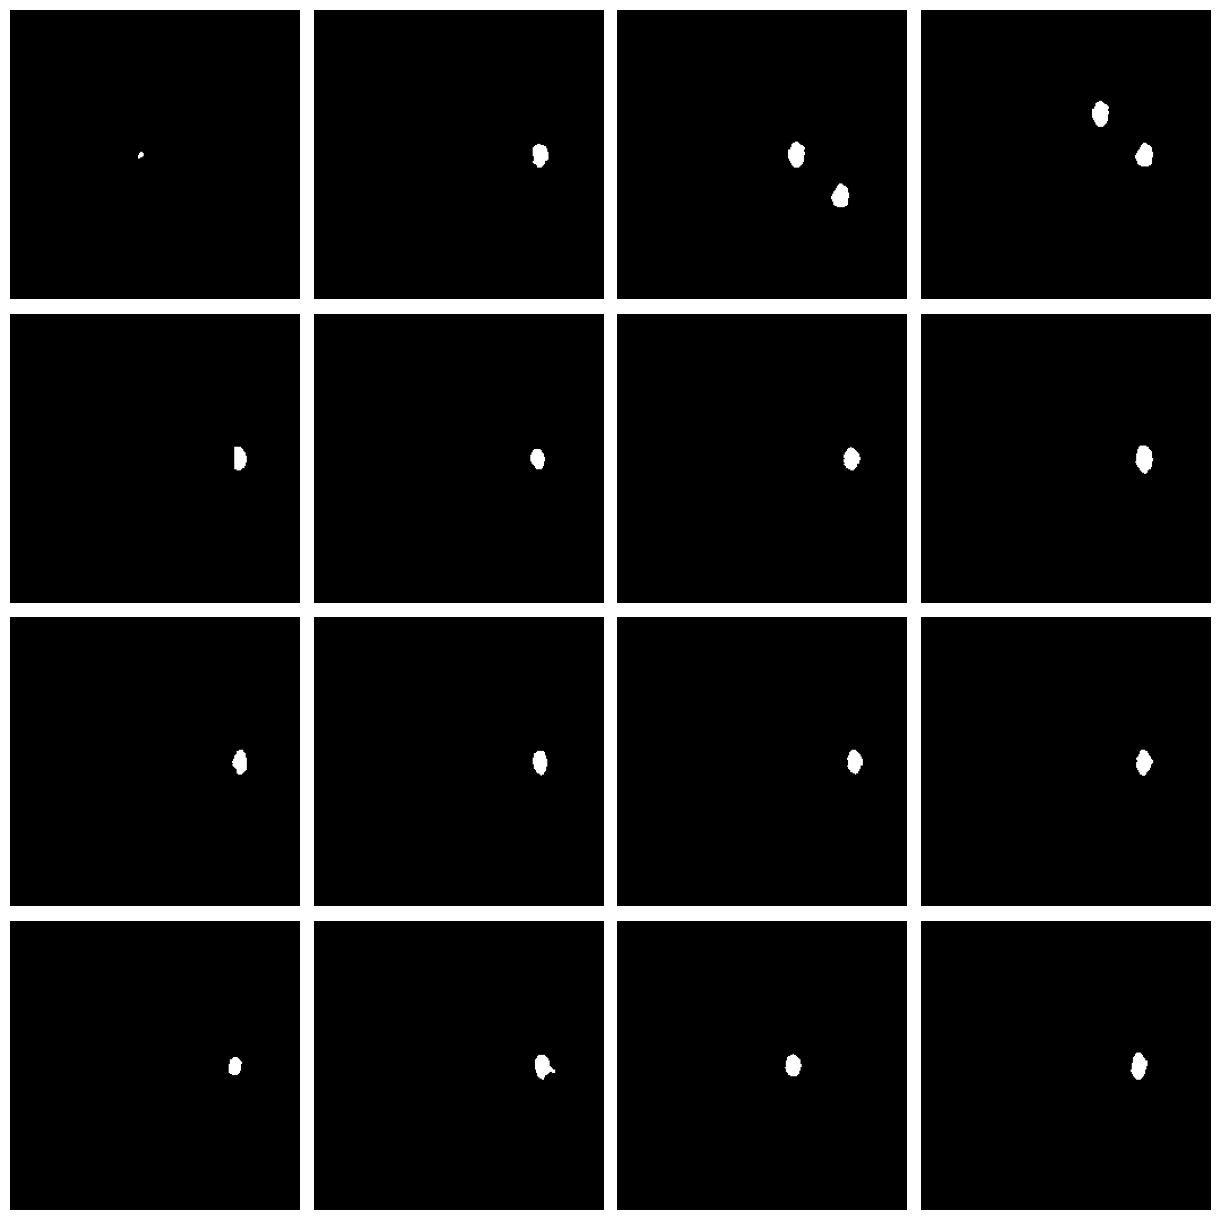

In [14]:
imgs_dir = '../data/train/mask/*'
imgs_paths = glob(imgs_dir)
imgs_paths = sorted(imgs_paths)

# Create list with all images in gray scale
images_gray = [ cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in imgs_paths]
images_gray = images_gray[:42]
# Visualizando imagens
plot_images(images_gray)

## Find Blobs

In [15]:
# OpenCV requires the closed images to be in a specific format: CV_8UC1

converted_images = []

for image in np.array(images_gray):
    # Ensure that the image is in uint8 format (CV_8U)
    if image.max() == 1:
        image *= 255
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    # Convert to CV_8UC1 format
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    converted_images.append(image)

In [16]:
contours = []
for img in converted_images:

    contours_list,_ = cv2.findContours(img, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_NONE)
    contours.append(contours_list)

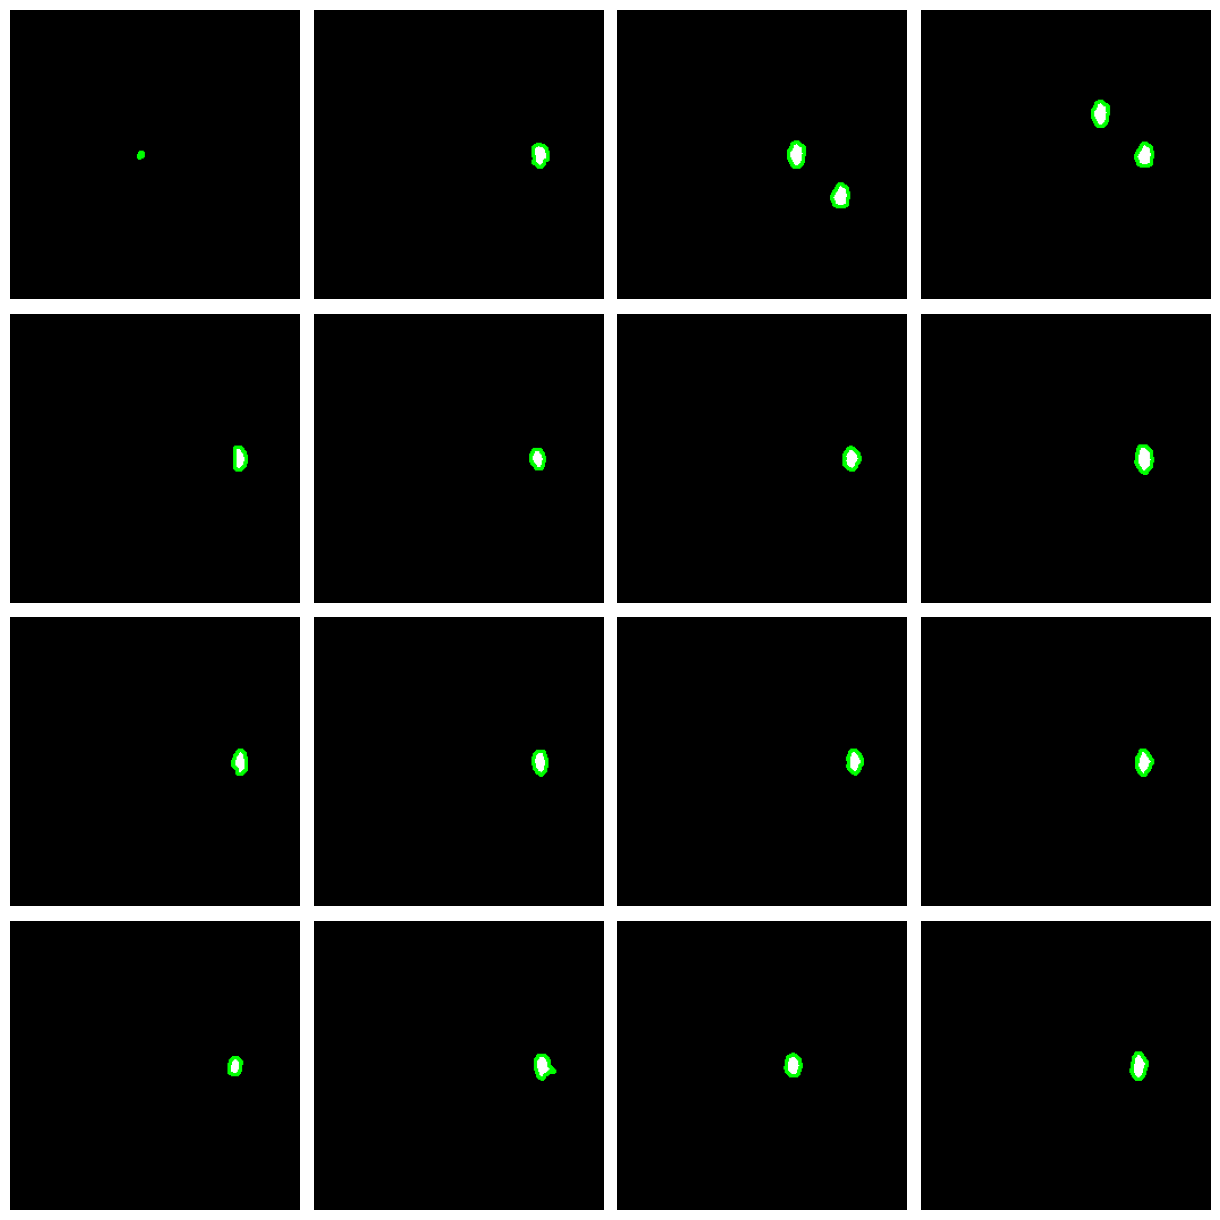

In [17]:
plot_images(converted_images, contours)

### Blob's Feature

In [41]:
contour_areas = []
eccentricities = []
arclengths = []
roundness = []

for contours_list in contours:

    for cntr in contours_list:
        
        area = cv2.contourArea(cntr)
        contour_areas.append(area)

        arclength = cv2.arcLength(cntr, True)
        arclengths.append(arclength)
        

        round_ratio =  4 * np.pi * area / ( arclength**2 )
        roundness.append(round_ratio)
        
        ellipse = cv2.fitEllipse(cntr)
        major_axis, minor_axis = ellipse[1]
        if major_axis*minor_axis>0:
            eccentricity = minor_axis/major_axis
            eccentricities.append(eccentricity)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


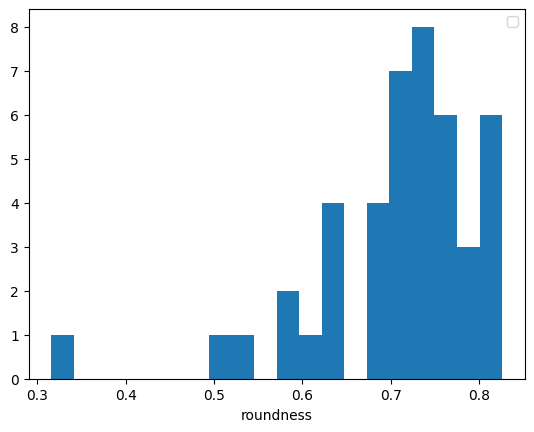

In [42]:
roundness.sort()
plt.hist(roundness[:-2], bins=20)
# plt.axvline(x=70, color='red', linestyle='--', label='Bottom area threshold')
# plt.axvline(x=230, color='red', linestyle='--', label='Upper area threshold')
plt.xlabel('roundness')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


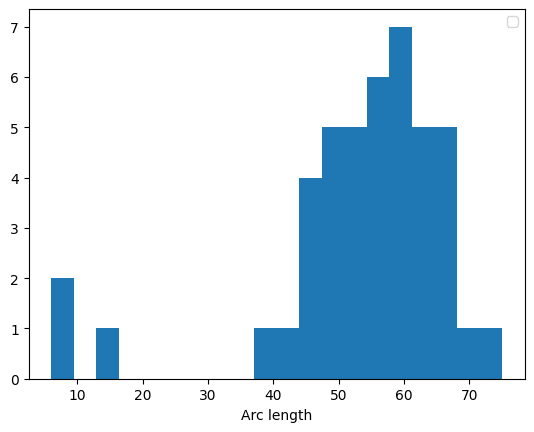

In [40]:
arclength.sort()
plt.hist(arclength[:-2], bins=20)
# plt.axvline(x=70, color='red', linestyle='--', label='Bottom area threshold')
# plt.axvline(x=230, color='red', linestyle='--', label='Upper area threshold')
plt.xlabel('Arc length')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


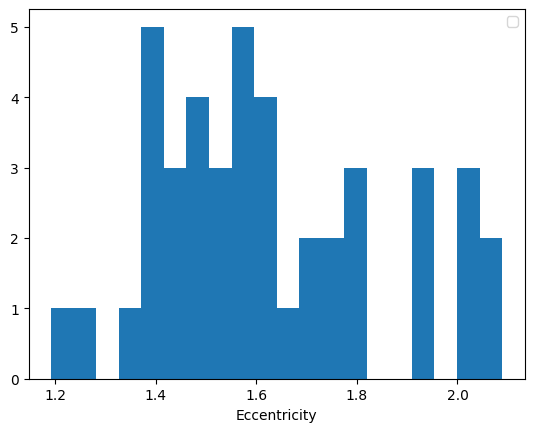

In [35]:
eccentricities.sort()
plt.hist(eccentricities[:-2], bins=20)
# plt.axvline(x=70, color='red', linestyle='--', label='Bottom area threshold')
# plt.axvline(x=230, color='red', linestyle='--', label='Upper area threshold')
plt.xlabel('Eccentricity')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


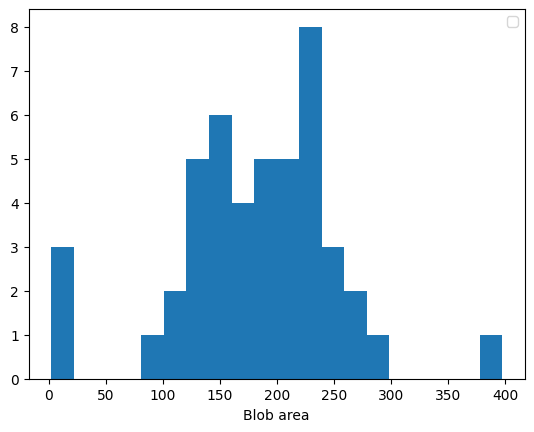

In [36]:
contour_areas.sort()
plt.hist(contour_areas, bins=20)
# plt.axvline(x=70, color='red', linestyle='--', label='Bottom area threshold')
# plt.axvline(x=230, color='red', linestyle='--', label='Upper area threshold')
plt.xlabel('Blob area')
plt.legend()
plt.show()